In [6]:
import pandas as pd
seqs = pd.read_csv("/home/chen/chengxu/LSHVec-master/test_deepmicrobes/embeddings4.csv")
seqs['emmbedding'] = seqs['read'].apply(lambda x: [float(i) for i in x.strip('[]').split()])
seqs['name'] = seqs['label'].apply(lambda x: 'Achromobacter' if x == 0 else 'Bacillus')
seqs.head()

,label,read,emmbedding,name
0,0,[ 2.90981170e-05 2.44142633e-04 1.02184975e-...,"[2.9098117e-05, 0.000244142633, 0.000102184975...",Achromobacter
1,0,[ 1.81765819e-04 5.06673314e-05 4.75041714e-...,"[0.000181765819, 5.06673314e-05, 0.00047504171...",Achromobacter
2,0,[ 8.86362177e-05 -1.29679320e-04 -1.07722981e-...,"[8.86362177e-05, -0.00012967932, -1.07722981e-...",Achromobacter
3,0,[-1.29915556e-04 -2.61687492e-05 2.90630909e-...,"[-0.000129915556, -2.61687492e-05, 0.000290630...",Achromobacter
4,0,[ 1.00658290e-04 1.98505459e-05 -5.15870306e-...,"[0.00010065829, 1.98505459e-05, -5.15870306e-0...",Achromobacter


CPU times: user 1min 41s, sys: 37.9 s, total: 2min 18s
Wall time: 49.5 s


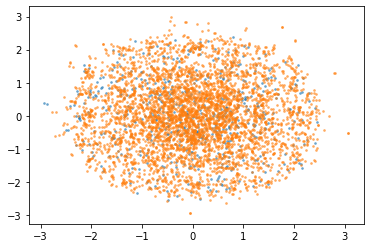

In [11]:
import matplotlib.pyplot as plt
import numpy as np
from MulticoreTSNE import MulticoreTSNE as TSNE
seqss=seqs.sample(5000,replace=False)
tsne = TSNE(n_components=2, perplexity=100, n_jobs=8)
X=np.array(list(seqss['emmbedding'].values))
X.shape
%time Y = tsne.fit_transform(X)
labels=seqss['name'].values
legends=list(set(labels))
for label in legends:
    plt.scatter(Y[labels==label][:,0],Y[labels==label][:,1],alpha=0.5,s=3)
plt.legend(legends)
plt.savefig('/home/chen/chengxu/LSHVec-master/test_deepmicrobes/train.png')
